<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [21]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-29 20:26:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  38.4MB/s    in 0.9s    

2024-06-29 20:26:18 (38.4 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [22]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [24]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [25]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [26]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [33]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


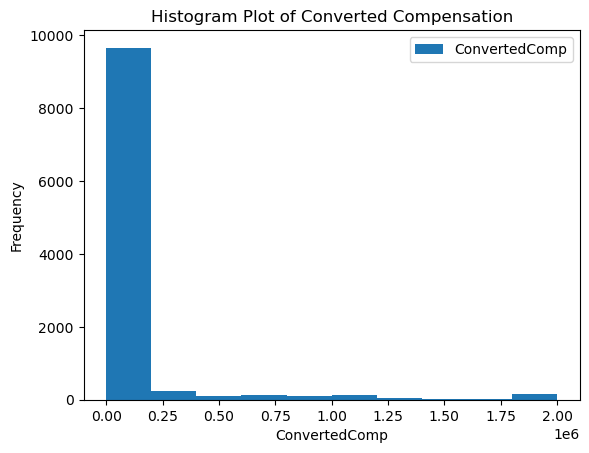

In [28]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.plot(kind='hist')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram Plot of Converted Compensation')

plt.show()

### Box Plots


Plot a box plot of `Age.`


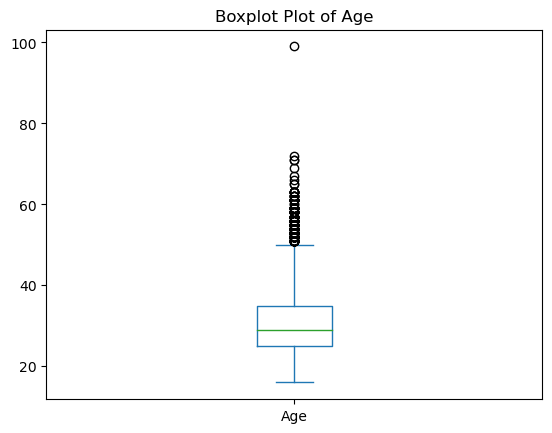

In [29]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.plot(kind='box')

plt.title('Boxplot Plot of Age')

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


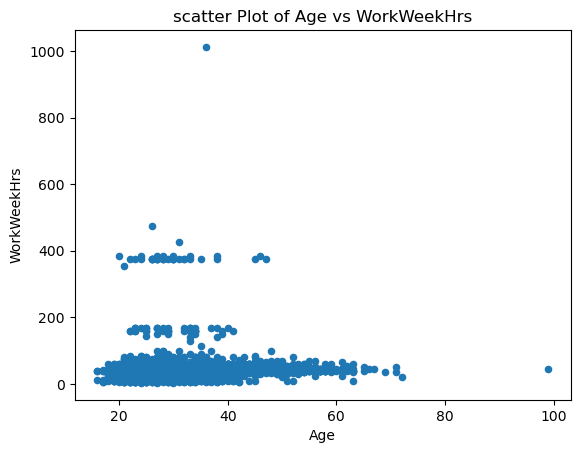

In [30]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df.plot(kind='scatter',x='Age',y='WorkWeekHrs')
plt.title('scatter Plot of Age vs WorkWeekHrs')

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


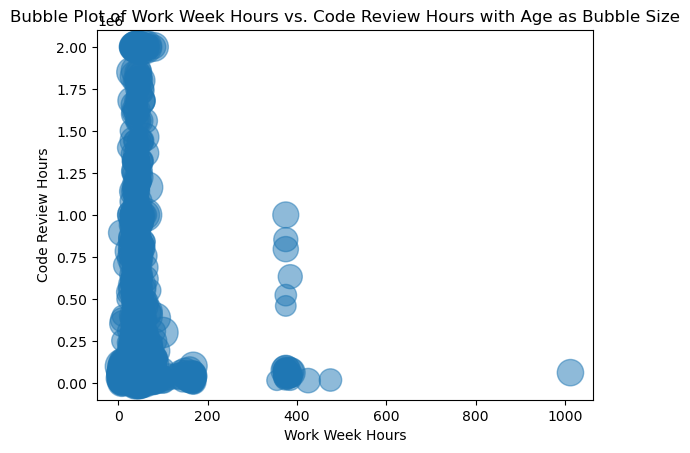

In [31]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs,ConvertedComp 
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
plt.scatter(df['WorkWeekHrs'], df['ConvertedComp'], s=df['Age']*10, alpha=0.5)
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot of Work Week Hours vs. Code Review Hours with Age as Bubble Size')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


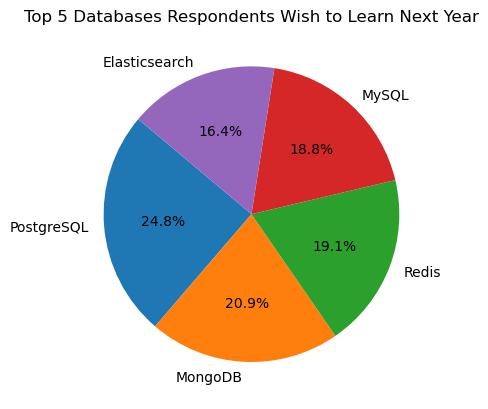

In [40]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear
FROM DatabaseDesireNextYear
order by DatabaseDesireNextYear
"""
df=pd.read_sql_query(QUERY,conn)
df=df['DatabaseDesireNextYear'].value_counts()
df=df.head(5)
plt.pie(df, labels=df.index, autopct='%1.1f%%', startangle=140)

plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

plt.show()

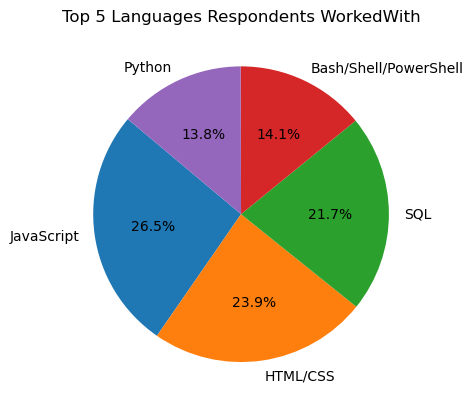

In [72]:
QUERY = """
SELECT LanguageWorkedWith
FROM LanguageWorkedWith
order by LanguageWorkedWith
"""
df=pd.read_sql_query(QUERY,conn)
df=df['LanguageWorkedWith'].value_counts()
df=df.head(5)
plt.pie(df, labels=df.index, autopct='%1.1f%%', startangle=140)

plt.title('Top 5 Languages Respondents WorkedWith')

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


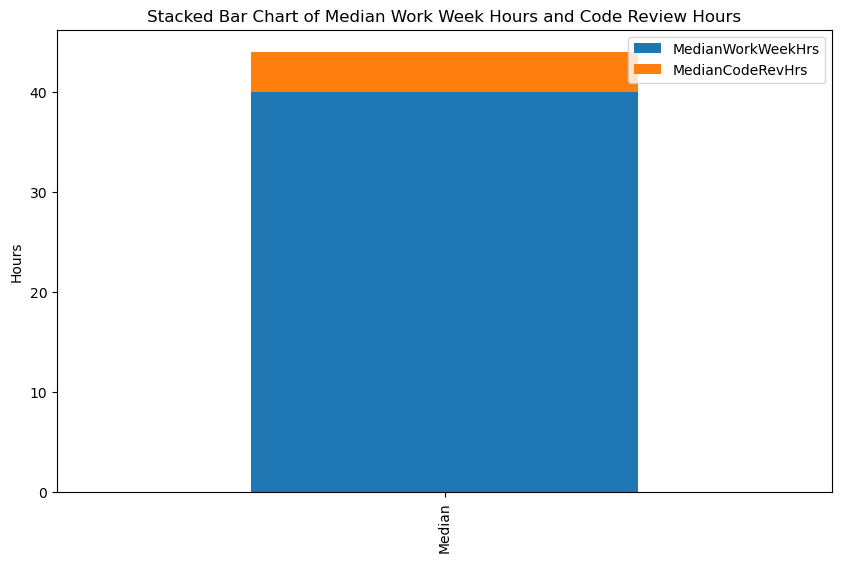

In [47]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
where Age between 30 and 35
"""
df=pd.read_sql_query(QUERY,conn)

median_workweekhrs = df['WorkWeekHrs'].median()
median_coderevhrs = df['CodeRevHrs'].median()

median_data = pd.DataFrame({
    'MedianWorkWeekHrs': [median_workweekhrs],
    'MedianCodeRevHrs': [median_coderevhrs]
})
ax = median_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.ylabel('Hours')
plt.title('Stacked Bar Chart of Median Work Week Hours and Code Review Hours')

ax.set_xticklabels(['Median'])

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


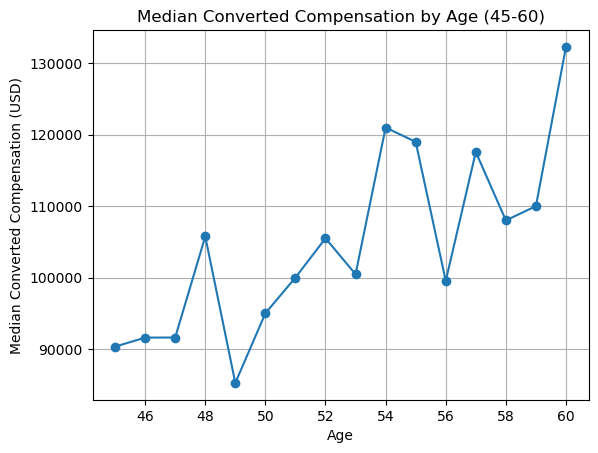

In [59]:
# your code goes here
QUERY = """
SELECT Age,ConvertedComp
FROM master
where Age between 45 and 60
"""
df=pd.read_sql_query(QUERY,conn)
df = df.groupby('Age')['ConvertedComp'].median().reset_index()
plt.plot(df['Age'],df['ConvertedComp'], marker='o')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation (USD)')
plt.title('Median Converted Compensation by Age (45-60)')
plt.grid(True)

# Show plot
plt.show()


### Bar Chart


MainBranchCreate a horizontal bar chart using column `MainBranch.`


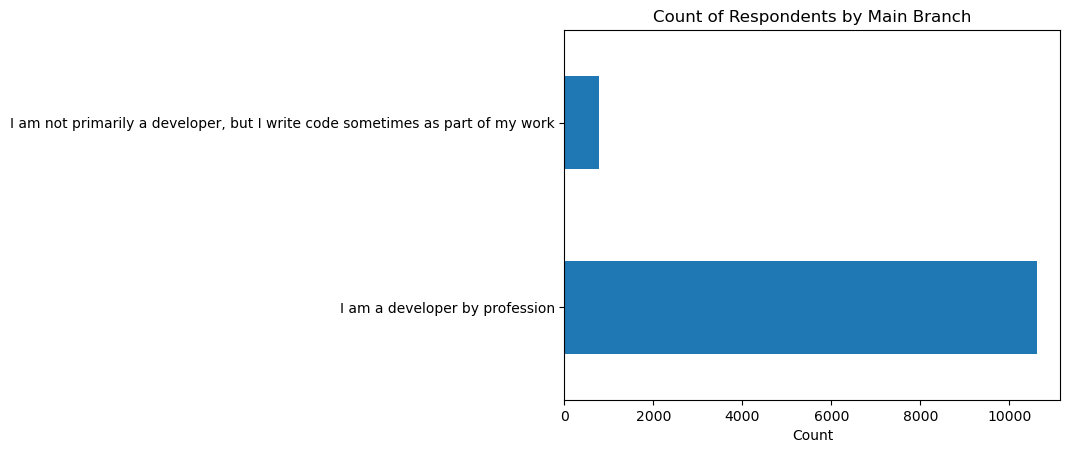

In [64]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df=pd.read_sql_query(QUERY,conn)
df = df['MainBranch'].value_counts()
df.plot(kind='barh')
plt.xlabel('Count')
plt.title('Count of Respondents by Main Branch')

plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
